# Final Project Code #

**Here we will have all the code related to the completion of the final project**

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# --- Load dataset from local CSV (using only 5 variables + target) ---
import pandas as pd

# Load local file (already uploaded in Colab)
csv_path = "/content/datafile.csv.zip"
df = pd.read_csv(csv_path)

# Keep only the columns we actually use
target_col = "Diabetes_012"
use_cols = [target_col, "HighBP", "HighChol", "BMI", "Age", "PhysActivity"]
df_small = df[use_cols].copy()

# Separate features and target
Target = df_small[[target_col]]
Features = df_small.drop(columns=[target_col])

# Basic metadata
metadata = {
    "source": "CDC Behavioral Risk Factor Surveillance System (BRFSS) 2015",
    "instances": df_small.shape[0],
    "variables": len(use_cols),
    "target_column": target_col,
    "description": "Subset of CDC dataset focused on five main health indicators linked to diabetes."
}

# Variable info
variables = pd.DataFrame({
    "Column": df_small.columns,
    "Non-Null Count": df_small.notnull().sum().values,
    "Dtype": df_small.dtypes.values
})

# Print results
print("=== Metadata ===")
for k, v in metadata.items():
    print(f"{k}: {v}")

print("\n=== Variables ===")
print(variables)

print("\n=== Target Preview ===")
print(Target.head())

print("\n=== Features Preview ===")
print(Features.head())


=== Metadata ===
source: CDC Behavioral Risk Factor Surveillance System (BRFSS) 2015
instances: 253680
variables: 6
target_column: Diabetes_012
description: Subset of CDC dataset focused on five main health indicators linked to diabetes.

=== Variables ===
         Column  Non-Null Count    Dtype
0  Diabetes_012          253680  float64
1        HighBP          253680  float64
2      HighChol          253680  float64
3           BMI          253680  float64
4           Age          253680  float64
5  PhysActivity          253680  float64

=== Target Preview ===
   Diabetes_012
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0

=== Features Preview ===
   HighBP  HighChol   BMI   Age  PhysActivity
0     1.0       1.0  40.0   9.0           0.0
1     0.0       0.0  25.0   7.0           1.0
2     1.0       1.0  28.0   9.0           0.0
3     1.0       0.0  27.0  11.0           1.0
4     1.0       1.0  24.0  11.0           1.0


In [ ]:
#Lets look at the proportion of the Target variable
print(Target.describe())

       Diabetes_binary
count    253680.000000
mean          0.139333
std           0.346294
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000


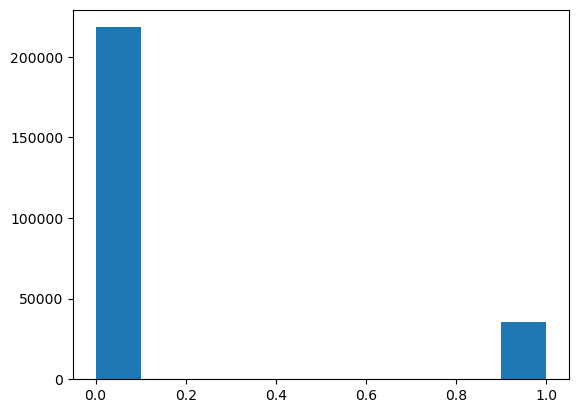

In [ ]:
plt.hist(Target)
plt.show()

In [ ]:
pivot_table = pd.pivot_table(
    df,
    values=['Sales', 'Profit'],  # Columns to aggregate
    index='Region',             # Rows (grouping by Region)
    columns='Product',          # Columns (grouping by Product)
    aggfunc='sum',              # Aggregation function (sum in this case)
    fill_value=0                # Fill missing v
)


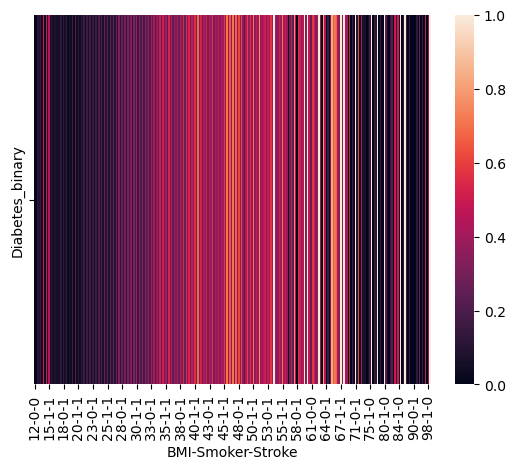

In [ ]:
test=cdc_diabetes_health_indicators.data.original
testNew = pd.pivot_table(
    test,
    values=['Diabetes_binary'],
    columns=['BMI','Smoker','Stroke']
)
sns.heatmap(testNew)
plt.show()

Dataset shape: (253680, 22)

Selected columns: ['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Age', 'PhysActivity']

Missing values per column:
 Diabetes_012    0
HighBP          0
HighChol        0
BMI             0
Age             0
PhysActivity    0
dtype: int64

BMI range after cleaning: 18.0 to 50.0

Train/Test split: (202944, 5) (50736, 5)

=== Logistic Regression ===


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0      0.938     0.649     0.767     42741
           1      0.028     0.190     0.049       926
           2      0.303     0.641     0.411      7069

    accuracy                          0.640     50736
   macro avg      0.423     0.493     0.409     50736
weighted avg      0.833     0.640     0.705     50736

ROC AUC: 0.7431955592348377

=== Random Forest ===
              precision    recall  f1-score   support

           0      0.939     0.613     0.742     42741
           1      0.027     0.272     0.048       926
           2      0.295     0.556     0.386      7069

    accuracy                          0.599     50736
   macro avg      0.420     0.481     0.392     50736
weighted avg      0.832     0.599     0.680     50736

ROC AUC: 0.6987194200405353

Feature Importance:
BMI             0.440943
Age             0.274420
HighBP          0.159643
HighChol        0.092235
PhysActivity    0.032760
dtype: float6

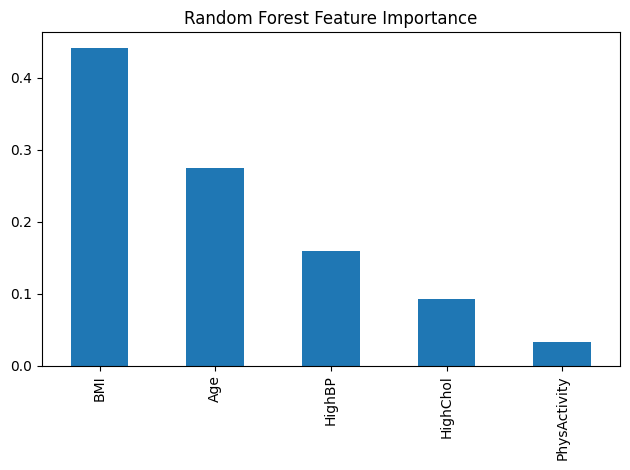


Saved cleaned dataset: cdc_diabetes_clean_5vars.csv


In [3]:

# --- Imports ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# --- Load local dataset (already uploaded in Colab) ---
csv_path = "/content/datafile.csv.zip"
df = pd.read_csv(csv_path)
print("Dataset shape:", df.shape)
df.head()

# --- Keep 5 main variables + target ---
# Target = Diabetes_012 (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)
target_col = "Diabetes_012"
use_cols = [target_col, "HighBP", "HighChol", "BMI", "Age", "PhysActivity"]
df_small = df[use_cols].copy()

print("\nSelected columns:", df_small.columns.tolist())
print("\nMissing values per column:\n", df_small.isna().sum())

# --- Clean BMI (remove extreme outliers) ---
q01, q99 = df_small["BMI"].quantile([0.01, 0.99])
df_small["BMI"] = df_small["BMI"].clip(lower=q01, upper=q99)
print("\nBMI range after cleaning:", df_small["BMI"].min(), "to", df_small["BMI"].max())

# --- Split data ---
X = df_small.drop(columns=[target_col])
y = df_small[target_col].astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTrain/Test split:", X_train.shape, X_test.shape)

# --- Scale BMI only ---
scaler = StandardScaler()
X_train["BMI"] = scaler.fit_transform(X_train[["BMI"]])
X_test["BMI"] = scaler.transform(X_test[["BMI"]])

# --- Logistic Regression ---
print("\n=== Logistic Regression ===")
logit = LogisticRegression(max_iter=300, multi_class="multinomial", class_weight="balanced")
logit.fit(X_train, y_train)
pred = logit.predict(X_test)
proba = logit.predict_proba(X_test)
print(classification_report(y_test, pred, digits=3))
print("ROC AUC:", roc_auc_score(y_test, proba, multi_class="ovr"))

# --- Random Forest ---
print("\n=== Random Forest ===")
rf = RandomForestClassifier(
    n_estimators=300, random_state=42, class_weight="balanced_subsample"
)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
proba_rf = rf.predict_proba(X_test)
print(classification_report(y_test, pred_rf, digits=3))
print("ROC AUC:", roc_auc_score(y_test, proba_rf, multi_class="ovr"))

# --- Feature Importance ---
imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(imp)

imp.plot(kind="bar", title="Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# --- Save cleaned dataset ---
df_small.to_csv("cdc_diabetes_clean_5vars.csv", index=False)
print("\nSaved cleaned dataset: cdc_diabetes_clean_5vars.csv")


### Why We Chose These 5 Variables
We focused on five variables that are known to have the strongest relationship with diabetes:
- **HighBP**: high blood pressure often occurs with diabetes.
- **HighChol**: high cholesterol is common in diabetic patients.
- **BMI**: obesity is a major risk factor for diabetes.
- **Age**: risk increases with age.
- **PhysActivity**: physical activity lowers the chance of diabetes.
